# CallArgs BEGINNER

Esta tabla contiene la información adicional de las sentencias de tipo Call (llamadas a funciones).  --> ABEL COMPLETAR <--

## 1 - Obtencion de datos

In [1]:
import matplotlib.pyplot as plt
from notebooks_utils import *

TARGET_FEATURE = 'callarg__expertise_level'
TARGET_CLASS = 'BEGINNER'
full_table = get_data('callargs')

instances_for_class_low = len(full_table[full_table[TARGET_FEATURE] == "BEGINNER"])
instances_for_class_high = len(full_table[full_table[TARGET_FEATURE] == "EXPERT"])

print(f"The dataset contains {instances_for_class_low} ({instances_for_class_low/len(full_table)*100:.4}%) instances for BEGINNER class and {instances_for_class_high} ({instances_for_class_high/len(full_table)*100:.4}%) for EXPERT class.")

2024-05-31 19:04:21.303720 Data cache files found ...
2024-05-31 19:04:21.424420 Data cache files successfully loaded!!
The dataset contains 338727 (39.37%) instances for BEGINNER class and 521668 (60.63%) for EXPERT class.


In [2]:
full_table = full_table[full_table[TARGET_FEATURE] == TARGET_CLASS]

# Table name, features and target.
TABLE_NAME = 'callargs'
TABLE_FEATURES = ['callarg__number_args', 'callarg__named_args_pct', 'callarg__double_star_args_pct']

# Load features and target.
X = full_table[TABLE_FEATURES]

# Print information about the loaded table.
print(f'Features shape: {X.shape}')

print(f'As we can see the downloaded data contains a total of {X.shape[0]} instances. For each instance we have {X.shape[1]} attributes.')

Features shape: (338727, 3)
As we can see the downloaded data contains a total of 338727 instances. For each instance we have 3 attributes.


## 2 - Exploracion de datos

Una vez tenemos nuestra tabla en un dataframe el siguiente paso es explorarla para ver qué tipo de información contiene.

In [3]:
print(X.info())

<class 'pandas.core.frame.DataFrame'>
Index: 338727 entries, 0 to 338726
Data columns (total 3 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   callarg__number_args           338727 non-null  int64  
 1   callarg__named_args_pct        338727 non-null  float64
 2   callarg__double_star_args_pct  338727 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 10.3 MB
None


Cómo podemos ver la tabla está compuesta por 3 variables numéricas y 1 de tipo objeto.

### 2.2 - Duplicados
Miramos si la tabla tiene entradas duplicadas.

In [4]:
number_of_duplicated_entries = sum(full_table.duplicated(subset=TABLE_FEATURES))
duplicated_entries_pct = number_of_duplicated_entries / len(full_table) * 100
print(f"The dataset contains [{duplicated_entries_pct:.4}%] of duplicated entries.")

The dataset contains [99.98%] of duplicated entries.


### 2.3 - Valores Nulos 
Miramos si alguna de las variables que contiene la tabla contiene algún valor que sea nulo.

In [5]:
X.isnull().sum()

callarg__number_args             0
callarg__named_args_pct          0
callarg__double_star_args_pct    0
dtype: int64

In [6]:
print_empty_cols(X)

callarg__number_args
--------------------
0 instancias no tienen un valor para la columna callarg__number_args


callarg__named_args_pct
-----------------------
0 instancias no tienen un valor para la columna callarg__named_args_pct


callarg__double_star_args_pct
-----------------------------
0 instancias no tienen un valor para la columna callarg__double_star_args_pct




### 2.4 - Describimos los valores de las variables de la tabla.

In [7]:
np.transpose(X.describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int']))

,count,mean,std,min,25%,50%,75%,max
callarg__number_args,338727.0,1.273441,1.052376,0.0,1.0,1.0,2.0,49.0
callarg__named_args_pct,338727.0,0.038775,0.171803,0.0,0.0,0.0,0.0,1.0
callarg__double_star_args_pct,338727.0,0.000011,0.002206,0.0,0.0,0.0,0.0,0.5


Vamos a discretizar las variables numericas, agrupando conjuntos de valores en categorias, para hacer un análisis de los datos. Para cada variable es necesaario ver la distribucion de lo valores para hacer los bins (categorias).

In [8]:
# DISCRETIZATION
X_copy = X.copy()

discretized_columns = {
    "callarg__number_args": [(0.0, 1.0), (1.0, 1.0), (1.0, 2.0), (2.0, inf)],  # min: 0.0 max: 96.0
    "callarg__named_args_pct": [(0.0, 0.0), (0.0, inf)],  # min: 0.0 max: 1.0
    "callarg__double_star_args_pct": [(0.0, 0.0), (0.0, inf)],  # min: 0.0 max: 1.0
}

discretize_columns(X_copy, discretized_columns)
    
# SINGLE FEATURE
print("--- SINGLE FEATURE ---")
print(get_statistics(X_copy, ['callarg__number_args'], 10))
print(get_statistics(X_copy, ['callarg__named_args_pct'], 10))
print(get_statistics(X_copy, ['callarg__double_star_args_pct'], 10))


# 2 FEATURES
print("--- TWO FEATURES ---")
#print(get_statistics(X_copy, ['module__function_defs_pct', 'module__number_of_classes'], 10))

# 3 FEATURES
print("--- THREE FEATURES ---")
#print(get_statistics(X_copy, ['module__class_defs_pct', 'module__function_defs_pct', 'module__enum_defs_pct'], 10))

--- SINGLE FEATURE ---
callarg__number_args  count  percentage
           [1.0_1.0] 193004   56.979219
           [2.0_inf]  93794   27.690146
           [0.0_1.0)  51929   15.330635

callarg__named_args_pct  count  percentage
              [0.0_0.0] 320046   94.484939
              [0.0_inf]  18681    5.515061

callarg__double_star_args_pct  count  percentage
                    [0.0_0.0] 338717   99.997048
                    [0.0_inf]     10    0.002952

--- TWO FEATURES ---
--- THREE FEATURES ---


In [9]:
def normalize_datatypes(X:pd.DataFrame) -> (pd.DataFrame, [str]):
    X = pd.get_dummies(X)
    X = X.astype('float32')        
    columns_names = X.columns.tolist()
    return X, columns_names

X, TABLE_FEATURES = normalize_datatypes(X)
# Print information about the loaded table
print(f'Features shape: {X.shape}')

Features shape: (338727, 3)


#### Muestra la matriz de correlación de pearson entre las variables de la tabla.

<Axes: >

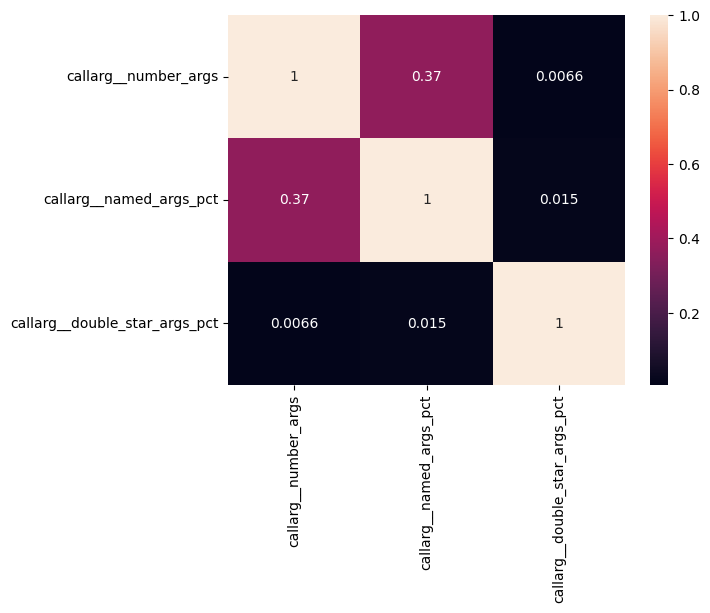

In [10]:
sns.heatmap(X.corr(), annot=True)

## 3 - Detección de valores atípicos (outliers)
## Univariate
## Analisis detallado de variables
Para cada una de las 3 variables (1 numerica y 2 porcentuales) se hara un analisis detallado

### Variable number_args (1/3)
Esta variable representa el número de argumentos de la llamada. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 0 - 49. Con una media de 1.27.

<Axes: ylabel='callarg__number_args'>

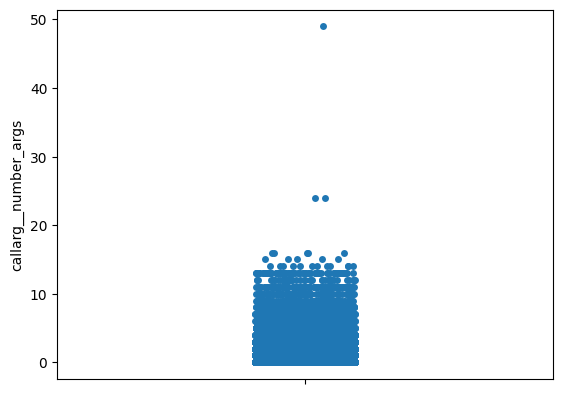

In [11]:
sns.stripplot(X['callarg__number_args'])

### IMPORTANTE
El valor máximo está muy alejado del siguiente.

In [12]:
print_outliers_for_df_column(X, 'callarg__number_args')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.8596251785594073
Rango valores atípicos extremos (Tukey): [-2.0,5.0]
Rango valores atípicos leves (Tukey): [-0.5,3.5]
Rango valores atípicos extremos (Fixed BoxPlot): [0.9259654214229233,48.710352560552835]
-3.0IQR: 0 instancias tienen un valor para callarg__number_args inferior a -2.0 (Q1-3*IQR) para callarg__number_args. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para callarg__number_args inferior a -0.5 (Q1-1.5*IQR) para callarg__number_args. Representando un 0.0% del total de instancias.
+1.5IQR: 10460 instancias tienen un valor para callarg__number_args superior a 3.5 (Q3+1.5*IQR) para callarg__number_args. Representando un 3.088% del total de instancias.
+3.0IQR: 2795 instancias tienen un valor para callarg__number_args superior a 5.0 (Q3-3*IQR) para callarg__number_args. Representando un 0.8251% del total de instancias.
L: 51929 instancias tienen un valor para callarg__number_ar

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 5.0 (Con un MC de 91 usamos Tuckey Extremo)

In [13]:
X[X['callarg__number_args'] > 5.0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,callarg__number_args,callarg__named_args_pct,callarg__double_star_args_pct
count,2795.000000,2795.000000,2795.000000
mean,7.421109,0.484620,0.000060
std,2.089562,0.427575,0.003153
min,6.000000,0.000000,0.000000
25%,6.000000,0.000000,0.000000
50%,7.000000,0.666667,0.000000
75%,8.000000,0.875000,0.000000
max,49.000000,1.000000,0.166667


### IMPORTANTE
Hay que revisar los dos valores extremos

### Variable named_args_pct (2/3)
Esta variable representa la proporción de los args que son pasados por nombre. Toma los valores de 0.0 - 1.0. La media es 0.038.

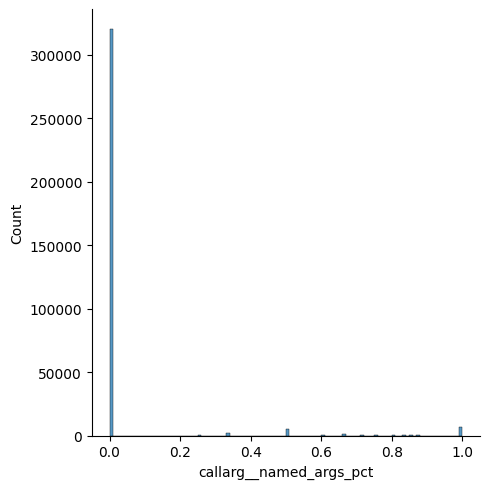

In [14]:
sns.displot(X['callarg__named_args_pct'], bins=[i / 100 for i in range(0, 101)])

In [15]:
print_outliers_for_df_column(X, 'callarg__named_args_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.8677666996403699
Rango valores atípicos extremos (Tukey): [0.0,0.0]
Rango valores atípicos leves (Tukey): [0.0,0.0]
Rango valores atípicos extremos (Fixed BoxPlot): [0.0,0.0]
-3.0IQR: 0 instancias tienen un valor para callarg__named_args_pct inferior a 0.0 (Q1-3*IQR) para callarg__named_args_pct. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para callarg__named_args_pct inferior a 0.0 (Q1-1.5*IQR) para callarg__named_args_pct. Representando un 0.0% del total de instancias.
+1.5IQR: 18681 instancias tienen un valor para callarg__named_args_pct superior a 0.0 (Q3+1.5*IQR) para callarg__named_args_pct. Representando un 5.515% del total de instancias.
+3.0IQR: 18681 instancias tienen un valor para callarg__named_args_pct superior a 0.0 (Q3-3*IQR) para callarg__named_args_pct. Representando un 5.515% del total de instancias.
L: 0 instancias tienen un valor para callarg__named_args_pct inferior

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 0 (Todos los umbrales son 0)

In [16]:
X[X['callarg__named_args_pct'] > 0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,callarg__number_args,callarg__named_args_pct,callarg__double_star_args_pct
count,18681.000000,18681.000000,18681.000000
mean,2.985708,0.703066,0.000202
std,1.833445,0.261063,0.009390
min,1.000000,0.020408,0.000000
25%,2.000000,0.500000,0.000000
50%,2.000000,0.666667,0.000000
75%,4.000000,1.000000,0.000000
max,49.000000,1.000000,0.500000


### IMPORTANTE
Casi el 95% no tienen argumentos pasados por nombre

### Variable double_star_args_pct (3/3)
Esta variable representa la proporción de args que son double star (**). Toma los valores de 0.0 - 1.0.

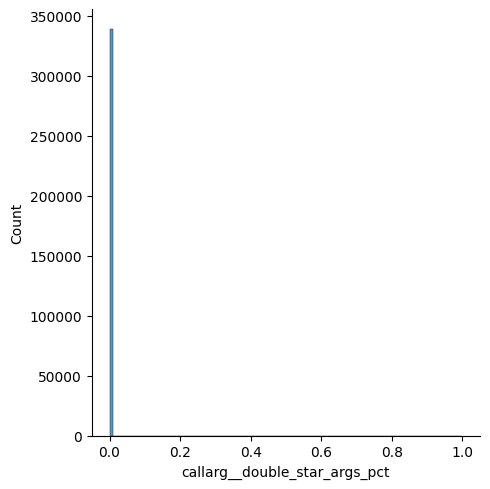

In [17]:
sns.displot(X['callarg__double_star_args_pct'], bins=[i / 100 for i in range(0, 101)])

In [18]:
print_outliers_for_df_column(X, 'callarg__double_star_args_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.9974679669307385
Rango valores atípicos extremos (Tukey): [0.0,0.0]
Rango valores atípicos leves (Tukey): [0.0,0.0]
Rango valores atípicos extremos (Fixed BoxPlot): [0.0,0.0]
-3.0IQR: 0 instancias tienen un valor para callarg__double_star_args_pct inferior a 0.0 (Q1-3*IQR) para callarg__double_star_args_pct. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para callarg__double_star_args_pct inferior a 0.0 (Q1-1.5*IQR) para callarg__double_star_args_pct. Representando un 0.0% del total de instancias.
+1.5IQR: 10 instancias tienen un valor para callarg__double_star_args_pct superior a 0.0 (Q3+1.5*IQR) para callarg__double_star_args_pct. Representando un 0.002952% del total de instancias.
+3.0IQR: 10 instancias tienen un valor para callarg__double_star_args_pct superior a 0.0 (Q3-3*IQR) para callarg__double_star_args_pct. Representando un 0.002952% del total de instancias.
L: 0 instancias tiene

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 0 (Todos los umbrales son 0)

In [19]:
X[X['callarg__double_star_args_pct'] > 0.0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,callarg__number_args,callarg__named_args_pct,callarg__double_star_args_pct
count,10.000000,10.000000,10.000000
mean,3.300000,0.623333,0.376667
std,1.702939,0.159513,0.159513
min,2.000000,0.500000,0.166667
25%,2.000000,0.500000,0.200000
50%,2.000000,0.500000,0.500000
75%,5.000000,0.800000,0.500000
max,6.000000,0.833333,0.500000


### IMPORTANTE
El 99,99% no usan double star

## Multivariate

TODO: isolation forest algorithm

In [20]:
from sklearn.ensemble import  IsolationForest

CONTAMINATION_FACTOR = 0.0012
isof_model = IsolationForest(contamination=CONTAMINATION_FACTOR, random_state=0)
isof_prediction = isof_model.fit_predict(X.values)
mask = isof_prediction == -1
full_table.loc[X.index[mask]]

,callarg__number_args,callarg__named_args_pct,callarg__double_star_args_pct,callarg__expertise_level
1511,9,1.000000,0.0,BEGINNER
3040,14,1.000000,0.0,BEGINNER
3047,10,0.800000,0.0,BEGINNER
3302,10,1.000000,0.0,BEGINNER
3303,8,0.875000,0.0,BEGINNER
...,...,...,...,...
311271,10,1.000000,0.0,BEGINNER
325788,12,0.083333,0.0,BEGINNER
325806,12,0.083333,0.0,BEGINNER
325878,12,0.083333,0.0,BEGINNER


### IMPORTANTE
Revisar los outliers